## Checking at the distribution of the steering vector

How does the sparcity looks like, how should we minimise the noise on it

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle

sys.path.append('../src')
from projection import *

In [4]:
vector_obj = pickle.load(open("../data/features/PCA_steeve_en->celeb.pkl", "rb"))


steeve = vector_obj[1].get_vector({
    "beta": 1,
    "clip_val": 0,
    "clip_type": "hard_clip",
    "alpha": 1,
    "act_space_norm": False,
    "norm_before_clip": False,
    "steeve_type": "act_mean" # act_mean # proj_mean_inv
})


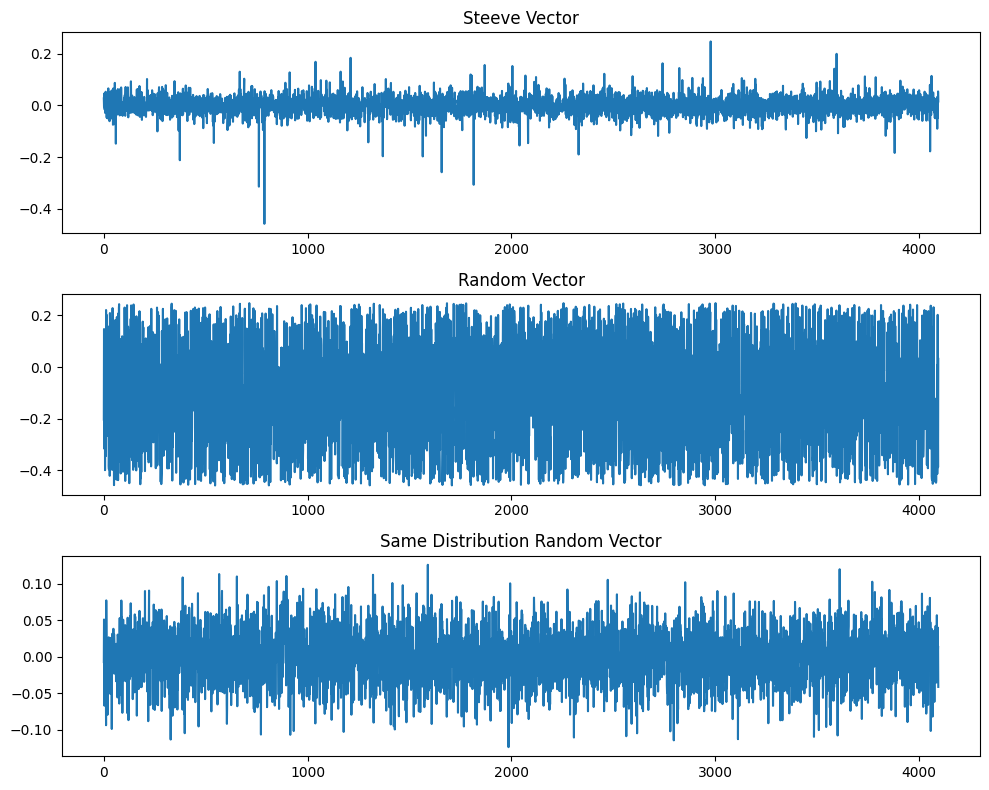

In [5]:
random_vector = np.random.uniform(low=np.min(steeve), high=np.max(steeve), size=steeve.shape)

same_distribution_random_vector = np.random.normal(
    loc=np.mean(steeve), 
    scale=np.std(steeve), 
    size=steeve.shape
)

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(steeve)
axs[0].set_title('Steeve Vector')

axs[1].plot(random_vector)
axs[1].set_title('Random Vector')

axs[2].plot(same_distribution_random_vector)
axs[2].set_title('Same Distribution Random Vector')

plt.tight_layout()
plt.show()

### Hard Threshold clipping

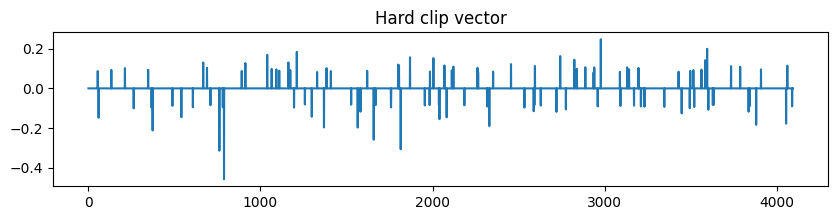

In [6]:
threshold = 0.08
clipped_steeve = steeve.copy()
clipped_steeve[np.abs(steeve) < threshold] = 0
plt.figure(figsize=(10, 2))
plt.plot(clipped_steeve)
plt.title('Hard clip vector')
plt.show()


### Soft clipping vector

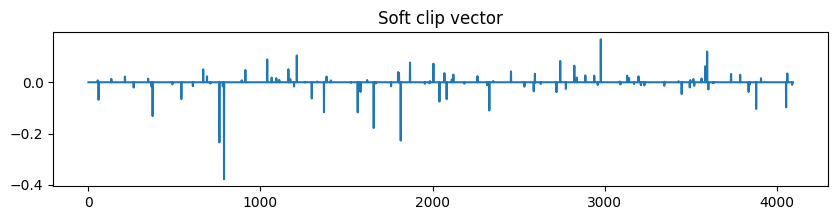

In [7]:
threshold = 0.08
clipped_steeve = steeve.copy()
clipped_steeve = np.sign(steeve) * np.maximum(np.abs(steeve) - threshold, 0)
plt.figure(figsize=(10, 2))
plt.plot(clipped_steeve)
plt.title('Soft clip vector')
plt.show()

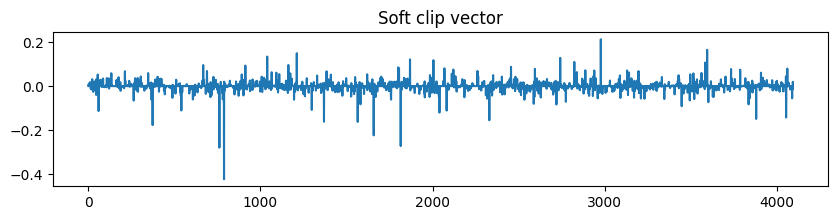

In [12]:
   # Clip the values in a "continuous" way
smallest_indices = np.argsort(np.abs(steeve))[:3000]
threshold = np.abs(steeve[smallest_indices[-1]])
clipped_steeve = steeve.copy()
clipped_steeve = np.sign(steeve) * np.maximum(np.abs(steeve) - threshold, 0)
plt.figure(figsize=(10, 2))
plt.plot(clipped_steeve)
plt.title('Soft clip vector')
plt.show()


### Sigmoid Clipping vector

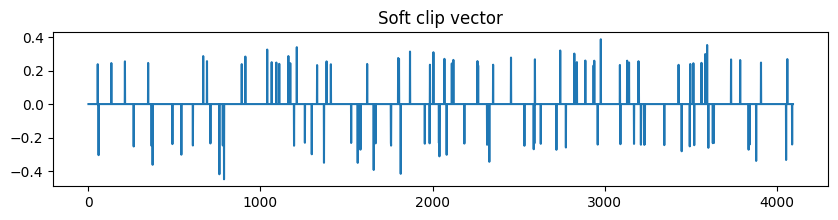

In [103]:
threshold = 0.08

def sigmoid_clip(vector, L=6, k=1, x0=0):
    return L / (1 + np.exp(-k * (vector - x0)))

def tanh_clip(vector, scale=6):
    return np.tanh(vector)

def sigmoid_clip_with_threshold(vector, T=3, L=6, k=1):
    # Apply sigmoid only to values outside the threshold
    clipped_vector = np.where(
        np.abs(vector) > T,
        np.sign(vector) * (L / (1 + np.exp(-k * (np.abs(vector) - T)))),
        vector
    )
    return clipped_vector


clipped_steeve = steeve.copy()
clipped_steeve[np.abs(steeve) < threshold] = 0
clipped_steeve = sigmoid_clip_with_threshold(clipped_steeve,  T=threshold, L=np.max(np.abs(steeve)), k=10)
plt.figure(figsize=(10, 2))
plt.plot(clipped_steeve)
plt.title('Soft clip vector')
plt.show()